In [1]:
import pandas as pd

In [2]:
CPI = pd.read_csv('CPI.csv')

In [3]:
# 將 'date' 列轉換為時間序列格式，假設格式為 'YYYYMM'
CPI['date'] = pd.to_datetime(CPI['date'], format='%Y%m')

# 查看結果
print(CPI)

          date  CPI_index
0   2013-01-01      93.41
1   2013-02-01      93.85
2   2013-03-01      92.50
3   2013-04-01      93.08
4   2013-05-01      93.25
..         ...        ...
139 2024-08-01     108.34
140 2024-09-01     108.46
141 2024-10-01     108.73
142 2024-11-01     108.84
143 2024-12-01     108.82

[144 rows x 2 columns]


In [4]:
CPI_index = CPI.CPI_index
CPI_index.head(3)

0    93.41
1    93.85
2    92.50
Name: CPI_index, dtype: float64

<Axes: >

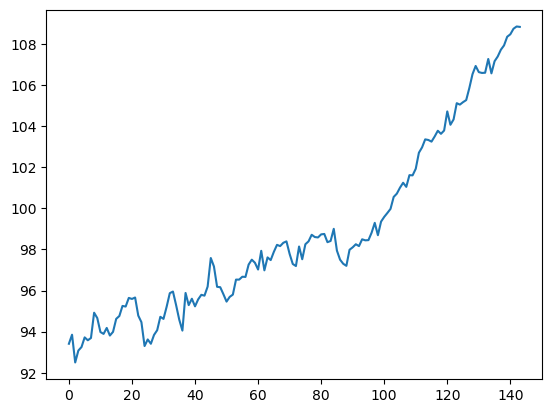

In [5]:
#畫圖
import matplotlib.pyplot as plt
CPI_index.plot()

In [6]:
#基本統計量
CPI_index.describe()

count    144.000000
mean      98.815556
std        4.364660
min       92.500000
25%       95.585000
50%       97.905000
75%      101.330000
max      108.840000
Name: CPI_index, dtype: float64

In [7]:
#利用ADF單根檢定是否為定態
from statsmodels.tsa.stattools import adfuller
result1_CPI_index=adfuller(CPI_index)
result1_CPI_index

#美化呈現結果
#\t%s表示退幾格呈現
#結果顯示未拒絕HO，所以為非定態
print('ADF Statistic: %f' % result1_CPI_index[0])
print('p-value: %f' % result1_CPI_index[1])
for key , value in result1_CPI_index[4].items():
    print('\t%s: %3f' % (key, value))

ADF Statistic: 1.213257
p-value: 0.996076
	1%: -3.477262
	5%: -2.882118
	10%: -2.577743


<Axes: >

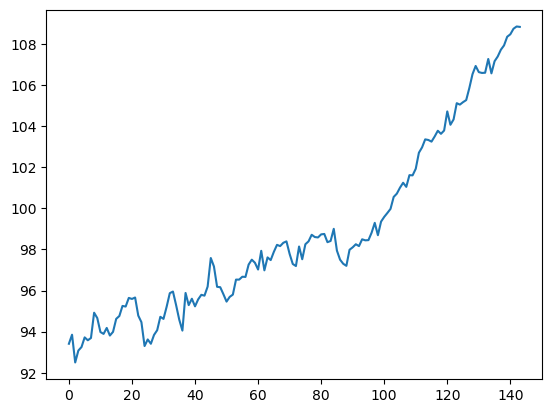

In [8]:
#看指數是否穩定
CPI_index.plot()

In [9]:
#計算成長率
#shift(1)表示前一期
CPI_index_ratio=(CPI_index-CPI_index.shift(1))/CPI_index.shift(1)
CPI_index_ratio

0           NaN
1      0.004710
2     -0.014385
3      0.006270
4      0.001826
         ...   
139    0.003892
140    0.001108
141    0.002489
142    0.001012
143   -0.000184
Name: CPI_index, Length: 144, dtype: float64

In [10]:
CPI_index_ratio=CPI_index_ratio.dropna()
CPI_index_ratio

1      0.004710
2     -0.014385
3      0.006270
4      0.001826
5      0.005040
         ...   
139    0.003892
140    0.001108
141    0.002489
142    0.001012
143   -0.000184
Name: CPI_index, Length: 143, dtype: float64

<Axes: >

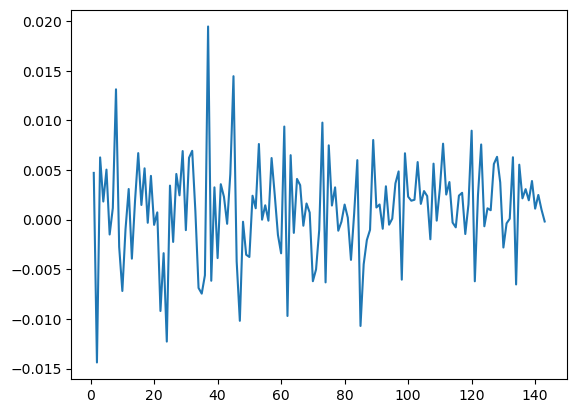

In [11]:
#看成長率是否穩定
CPI_index_ratio.plot()

In [12]:
#利用ADF單根檢定是否為定態
from statsmodels.tsa.stattools import adfuller
result2_CPI_index=adfuller(CPI_index_ratio)
result2_CPI_index

#美化呈現結果
#\t%s表示退幾格呈現
#結果顯示拒絕HO，所以為定態
print('ADF Statistic: %f' % result2_CPI_index[0])
print('p-value: %f' % result2_CPI_index[1])
for key , value in result2_CPI_index[4].items():
    print('\t%s: %3f' % (key, value))

ADF Statistic: -13.988986
p-value: 0.000000
	1%: -3.477262
	5%: -2.882118
	10%: -2.577743


In [13]:
#計算自相關係數ACF
from statsmodels.tsa import stattools

In [14]:
#用星星表示下載全部模組的套件
from statsmodels.graphics.tsaplots import *

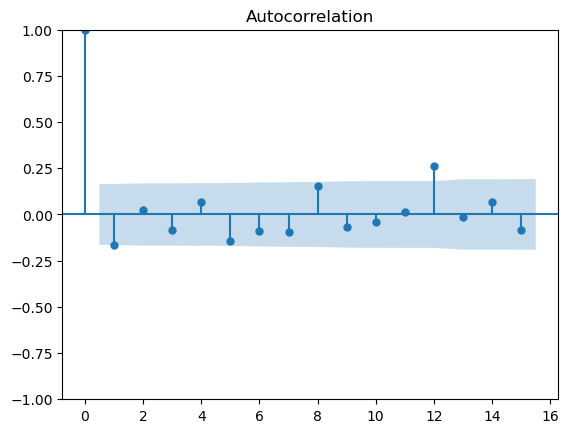

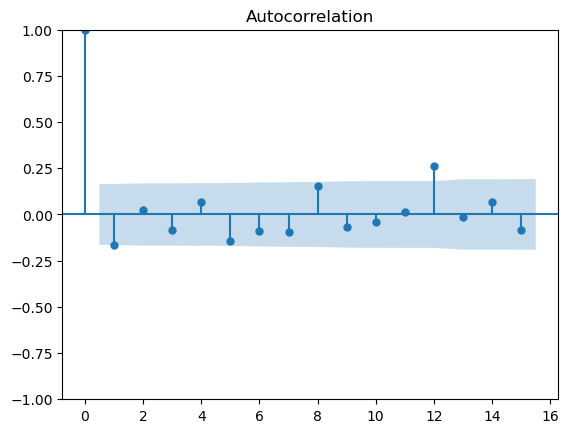

In [15]:
#結果表示穩定較不容易受間接效果影響
plot_acf(CPI_index_ratio,lags=15)

In [16]:
acf_CPI_index=stattools.acf(CPI_index_ratio)
acf_CPI_index

array([ 1.        , -0.16420394,  0.02244933, -0.08415119,  0.06756061,
       -0.14134416, -0.09148678, -0.09469427,  0.15628832, -0.06724253,
       -0.04303631,  0.01513225,  0.26065682, -0.0128662 ,  0.06910348,
       -0.08218659,  0.15928477, -0.11617408, -0.06287573, -0.16658211,
        0.12649109, -0.07731578])

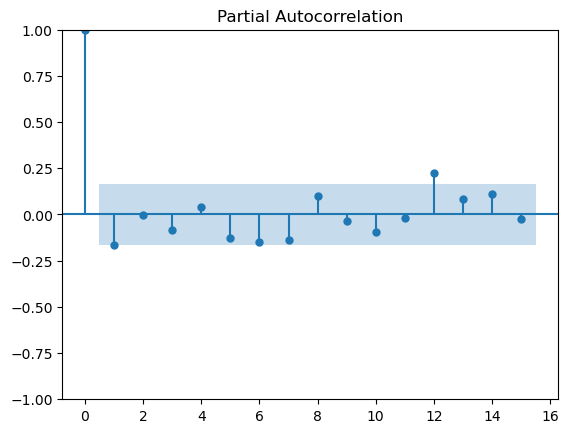

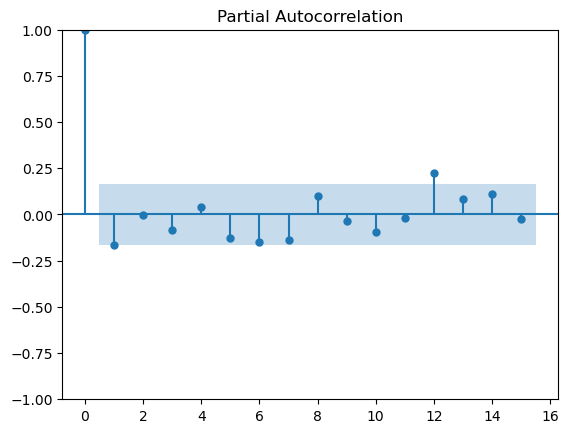

In [17]:
plot_pacf(CPI_index_ratio,lags=15)

In [18]:
pacf_CPI_index=stattools.pacf(CPI_index_ratio)
pacf_CPI_index

array([ 1.00000000e+00, -1.65360307e-01, -4.70492167e-03, -8.52836706e-02,
        4.29980068e-02, -1.32612476e-01, -1.54067343e-01, -1.45174768e-01,
        1.03735925e-01, -3.93084114e-02, -1.01977132e-01, -2.34380154e-02,
        2.45528091e-01,  9.51210662e-02,  1.21646394e-01, -2.98956782e-02,
        1.46842717e-01,  2.44869673e-02,  4.25508605e-04, -1.57078628e-01,
        2.08538219e-02, -2.67025868e-02])

In [19]:
#ARMA模型(p,幾階差分,q)
from statsmodels.tsa.arima.model import ARIMA

In [20]:
#先嘗試MA模型 MA(1)
#先設定模型參數然後再跑
#BIC和BIC值愈小愈好
model1=ARIMA(CPI_index_ratio,order=(0,0,1)).fit()
model1.summary()

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              CPI_index   No. Observations:                  143
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 556.614
Date:                Sat, 11 Jan 2025   AIC                          -1107.228
Time:                        23:49:03   BIC                          -1098.340
Sample:                             0   HQIC                         -1103.616
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.000      2.920      0.003       0.000       0.002
ma.L1         -0.1364      0.077     -1.773      0.076      -0.287       0.014
sigma2      2.435e-05   2.28e-06     10.701      0.000    1.99e-05    2.88e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                11.34
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
#再嘗試AR模型 AR(1)
#先設定模型參數然後再跑
model2=ARIMA(CPI_index_ratio,order=(1,0,0)).fit()
model2.summary()

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              CPI_index   No. Observations:                  143
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 556.670
Date:                Sat, 11 Jan 2025   AIC                          -1107.339
Time:                        23:49:03   BIC                          -1098.451
Sample:                             0   HQIC                         -1103.728
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.000      2.977      0.003       0.000       0.002
ar.L1         -0.1643      0.081     -2.037      0.042      -0.322      -0.006
sigma2       2.43e-05   2.22e-06     10.942      0.000    1.99e-05    2.86e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                11.91
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
#再嘗試ARMA模型 ARMA(1,1)
#先設定模型參數然後再跑
model3=ARIMA(CPI_index_ratio,order=(1,0,1)).fit()
model3.summary()

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              CPI_index   No. Observations:                  143
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 556.614
Date:                Sat, 11 Jan 2025   AIC                          -1105.228
Time:                        23:49:03   BIC                          -1093.376
Sample:                             0   HQIC                         -1100.412
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.000      2.828      0.005       0.000       0.002
ar.L1         -0.1080      0.553     -0.195      0.845      -1.191       0.975
ma.L1         -0.0284      0.547     -0.052      0.959      -1.101       1.044
sigma2      2.435e-05   2.35e-06     10.380      0.000    1.98e-05     2.9e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                11.87
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
#再嘗試MA模型 MA(2)
#先設定模型參數然後再跑
model4=ARIMA(CPI_index_ratio,order=(0,0,2)).fit()
model4.summary()

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              CPI_index   No. Observations:                  143
Model:                 ARIMA(0, 0, 2)   Log Likelihood                 556.569
Date:                Sat, 11 Jan 2025   AIC                          -1105.137
Time:                        23:49:04   BIC                          -1093.286
Sample:                             0   HQIC                         -1100.322
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.000      2.829      0.005       0.000       0.002
ma.L1         -0.1272      0.079     -1.601      0.109      -0.283       0.029
ma.L2          0.0011      0.073      0.015      0.988      -0.142       0.145
sigma2      2.437e-05   2.36e-06     10.318      0.000    1.97e-05     2.9e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                11.48
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
#再嘗試AR模型 AR(2)
#先設定模型參數然後再跑
model5=ARIMA(CPI_index_ratio,order=(2,0,0)).fit()
model5.summary()

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              CPI_index   No. Observations:                  143
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 556.654
Date:                Sat, 11 Jan 2025   AIC                          -1105.309
Time:                        23:49:04   BIC                          -1093.458
Sample:                             0   HQIC                         -1100.493
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.000      2.855      0.004       0.000       0.002
ar.L1         -0.1495      0.080     -1.861      0.063      -0.307       0.008
ar.L2         -0.0021      0.075     -0.028      0.978      -0.150       0.145
sigma2      2.434e-05   2.34e-06     10.413      0.000    1.98e-05    2.89e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                11.89
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
#再嘗試ARMA模型 ARMA(2,2)
#先設定模型參數然後再跑
model6=ARIMA(CPI_index_ratio,order=(2,0,2)).fit()
model6.summary()

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              CPI_index   No. Observations:                  143
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 556.668
Date:                Sat, 11 Jan 2025   AIC                          -1101.336
Time:                        23:49:05   BIC                          -1083.559
Sample:                             0   HQIC                         -1094.113
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.000      2.995      0.003       0.000       0.002
ar.L1         -0.0808      0.042     -1.907      0.057      -0.164       0.002
ar.L2          0.0040      0.580      0.007      0.995      -1.134       1.142
ma.L1         -0.0819      0.041     -1.988      0.047      -0.163      -0.001
ma.L2         -0.0011      0.560     -0.002      0.999      -1.099       1.096
sigma2      2.442e-05   2.38e-06     10.275      0.000    1.98e-05    2.91e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                11.57
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.14e+18. Standard errors may be unstable.
"""

In [26]:
#最後選擇AR(1)
#檢查AR(1)殘差，做殘差檢定
#計算標準化殘差
import math
import numpy as np
stdresid=model2.resid/math.sqrt(np.var(model2.resid))
stdresid

1      0.736660
2     -3.013099
3      0.537995
4      0.324997
5      0.828490
         ...   
139    0.599794
140    0.100090
141    0.287476
142    0.033941
143   -0.257596
Length: 143, dtype: float64

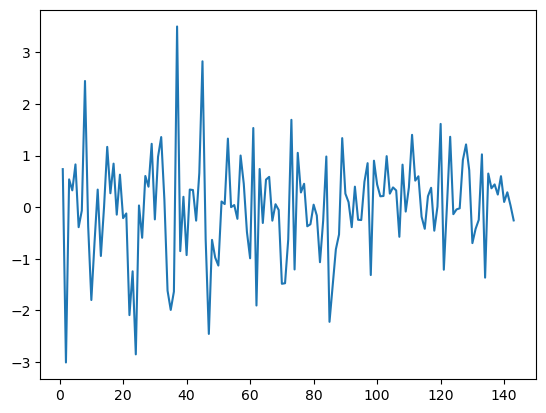

In [27]:
#結果看起來為隨機，不過需要作檢定
plt.plot(stdresid)

In [28]:
#檢測隨機漫步 LB test
#結果表示拒絕H0，為隨機漫步
#只顯示最後一個 p-value
#檢測殘差
#p值很小所以具有隨機性
LungBox_ret=stattools.q_stat(stattools.acf(stdresid),len(stdresid))
LungBox_ret[1][-1]

7.0076727090840755e-28

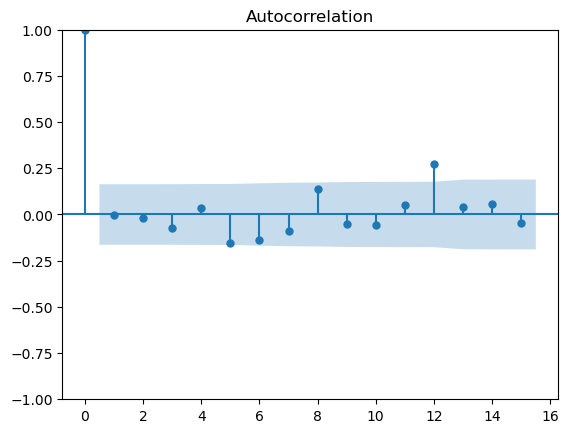

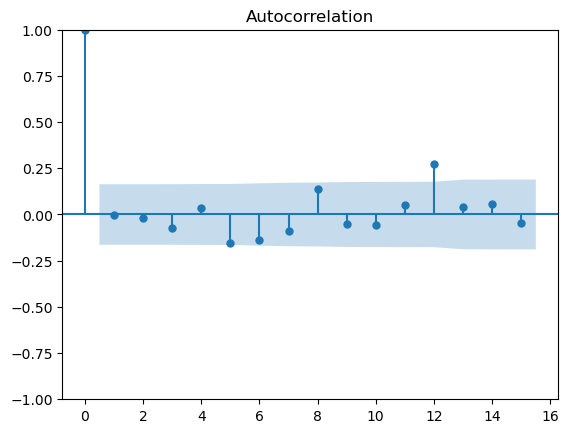

In [29]:
#圖形表示穩定
plot_acf(stdresid,lags=15)

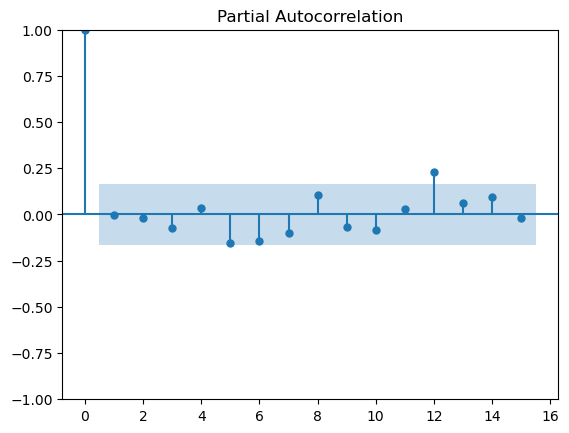

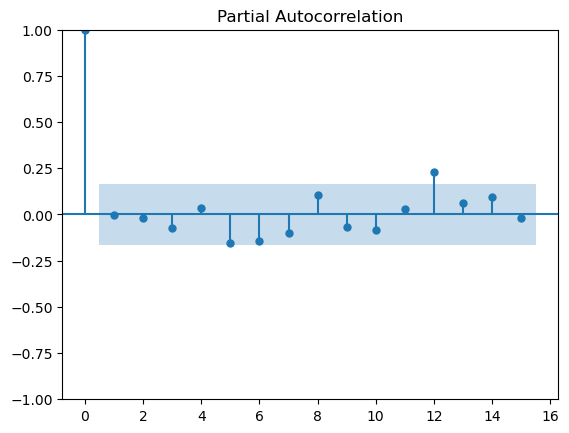

In [30]:
#用pacf相對acf更穩定
plot_pacf(stdresid,lags=15)

In [31]:
model2.forecast(5)

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


143    0.001283
144    0.001042
145    0.001082
146    0.001075
147    0.001077
Name: predicted_mean, dtype: float64